# HW1 - Q2: Eigenvalues and Eigenvectors (30 points)
Notes:
* Questions (a), (b) need to be typewritten.
* Questions (c), (d) need to be programmed.
* For typewritten solution:
  * Write all the steps of the solution . 
  * Use proper LATEX formatting and notation for all mathematical equations, vectors, and matrices. 
* For programming solution:
  * Properly add comments to your code.




---



### **(a)** Write down the characteristic equation for matrix 
$A= \begin{bmatrix}
2 & 2 \\
5 & -1
\end{bmatrix}$. 
### Use the above characteristic equation to solve for eigenvalues and normalized eigenvectors of matrix $A$. (7 points)

#### <font color="red">Your answer here:</font>

$$
\begin{align}
\mathbf{Ax} &= \mathbf{\lambda x} = \mathbf{\lambda Ix} \\
\mathbf{Ax} - \mathbf{\lambda Ix} &= 0 \\
(\mathbf{A} - \mathbf{\lambda I}) \mathbf{x} &= 0 \\
x \neq 0 \implies \det (\mathbf{A - \lambda I}) &= 0
\\\\
\mathbf{A} - \mathbf{\lambda} \mathbf{I} &= \
\begin{bmatrix}
    2-\mathbf{\lambda} && 2 \\
    5 && -1-\mathbf{\lambda} \\
\end{bmatrix} \\
\det(\mathbf{A - \lambda I}) &= \
    ((2 - \mathbf{\lambda}) \cdot (-1 -\mathbf{\lambda})) - (2 \cdot 5) = (-2-2\mathbf{\lambda} + \mathbf{\lambda} + \
    \mathbf{\lambda}^2) - 10 \\
\det(\mathbf{A} - \mathbf{\lambda I}) & = \mathbf{\lambda}^2 - \mathbf{\lambda} - 12 \\
\det(\mathbf{A} - \mathbf{\lambda I}) &= (\mathbf{\lambda} - 4) (\mathbf{\lambda} + 3) \\
\\\\
\lambda_1 &= 4 \\
(\mathbf{A} - 4\mathbf{I}) \mathbf{x} &= \
    \begin{bmatrix}
        -2 && 2 \\
        5 && 5 \\
    \end{bmatrix} \
    \begin{bmatrix}x_1 \\ x_2\end{bmatrix} = 0 \\
-2 x_1 + 2 x_2 &= 0 \\
5 x_1 + 5 x_2 &= 0  \\
x_1 &= 1 \\
x_2 &= 1 \\
\mathbf{x} &= \begin{bmatrix}1 \\ 1 \end{bmatrix} \\
\\\\
\lambda_1 &= -3 \\
(\mathbf{A} + 3\mathbf{I}) \mathbf{x} &= \
    \begin{bmatrix}
        5 && 2 \\
        5 && 2 \\
    \end{bmatrix} \
    \begin{bmatrix}x_1 \\ x_2\end{bmatrix} = 0 \\
5 x_1 + 2 x_2 &= 0 \\
x_1 &= \frac{-2 x_2}{5} \\
x_2 &= 5 \\
x_1 &= -2 \\
\mathbf{x} &= \begin{bmatrix}-2 \\ 5 \end{bmatrix} \\
\end{align}
$$

---

### **(b)** Prove that if a real matrix $A_{n\times n}$ has unique eigenvalues (i.e. $\lambda_i\ne \lambda_j\,\forall\, i\ne j$), then the eigenvectors $x_i$ are linearly independent.  (7 points)
### Hint: Prove by contradiction, start with $n=2$ case.

#### <font color="red">Your answer here:</font>



---



### **(c)** Write function `power_method(A,x)`, which takes as input matrix $A$ and a vector $\mathbf{x}$, and uses power method to calculate eigenvalue and eigenvector. Get the largest eigenvalue and eigenvector for matrix $A=\begin{bmatrix}
2 & 1 & 2 \\
1 & 3 & 2 \\
2 & 4 & 1 
\end{bmatrix} $ 
### using above function. Start with intial eigenvector guesses: `[-1, 0.5, 3]` and `[2,-6,0.2]`. For each of the vectors, iterate until convergence. Plot how the eigenvalue changes w.r.t. iterations. Report the number of steps it took to converge, eigenvalue and eigenvector. Match your output with the results generated by the numpy API: `numpy.linalg.eig `
### Note that you only need to look at magnitudes of eigenvalues. Use an absolute tolerance of  $10^{-6}$  between eigenvalue output of previous and current iteration as stopping criteria. You may also need to normalize the final eigenvector to match with output of numpy API `numpy.linalg.eig`. (8 points)

In [1]:
# !!!! YOUR CODE HERE !!!!
import numpy as np
import matplotlib.pyplot as plt

def power_method(A, x, abs_tol=1e-6, max_iter=1000):
    """Compute eigenvalue & eigenvector via power method."""
    
    # Initialize eigenvector
    v = x
    v_diff = np.inf
    v_last = np.inf
    
    # Initilize eigenvalue
    w_norm = np.zeros(max_iter)
    
    # Iterative search
    k = 0
    while v_diff > abs_tol and k < max_iter:
        
        # Update eigenvalue
        w = np.dot(A, v)
        w_norm[k] = np.linalg.norm(w)
        
        # Update eigenvector
        v = w / w_norm[k]
        
        # Delta eigenvector
        v_diff = np.linalg.norm(v-v_last)
        v_last = v

        k += 1

    w_norm = w_norm[:k]
    
    return w_norm, v

# Define arrays
A = np.array([
    [2, 1, 2],
    [1, 3, 2],
    [2, 4, 1]
])

x0 = np.array([-1, .5, 3])
x1 = np.array([2, -6, .2])

# Compute with custom function
w0, v0 = power_method(A, x0)
w1, v1 = power_method(A, x1)

# Compute with numpy
w_np, v_np = np.linalg.eig(A)

# Print results
initial_x = ['x=[-1, .5, 3]', 'x=[2, -6, .2]']
data = [[len(w0), str(w0[-1].round(3)), *[str(i.round(3)) for i in v0]],
        [len(w1), str(w1[-1].round(3)), *[str(i.round(3)) for i in v1]]]

column_labels = ['n_steps', 'eigenvalue', 'v1', 'v2', 'v3']
row_format ="{:>15}" * (len(column_labels) + 1)
print(row_format.format("", *column_labels))

for row_label, row in zip(initial_x, data):
    #print(row_label)
    print(row_format.format(row_label, *row))

                       n_steps     eigenvalue             v1             v2             v3
  x=[-1, .5, 3]             11          6.029          0.472          0.589          0.656
  x=[2, -6, .2]             11          6.029         -0.472         -0.589         -0.656


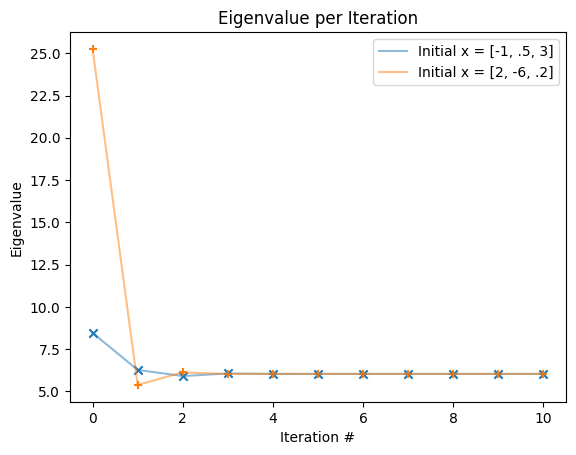

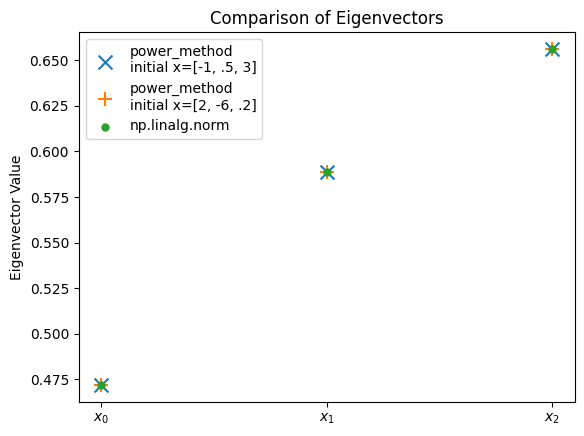

In [2]:
# Plot eigenvalues
plt.figure(0)

plt.plot(w0, label='Initial x = [-1, .5, 3]', alpha=.5)
plt.plot(w1, label='Initial x = [2, -6, .2]', alpha=.5)
plt.scatter(np.arange(len(w0)), w0, marker='x')
plt.scatter(np.arange(len(w1)), w1, marker='+')


plt.xlabel('Iteration #')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalue per Iteration')
plt.legend()

# Plot eigenvectors
plt.figure(1)

plt.scatter([1, 2, 3], np.abs(v0), s=100, marker='x',
            label='power_method\ninitial x=[-1, .5, 3]')
plt.scatter([1, 2, 3], np.abs(v1), s=100, marker='+',
            label='power_method\ninitial x=[2, -6, .2]')
plt.scatter([1, 2, 3], np.abs(v_np[:, 0]), s=100, marker='.',
            label='np.linalg.norm')

plt.title('Comparison of Eigenvectors')
plt.xticks([1, 2, 3], labels=[r'$x_0$', r'$x_1$', r'$x_2$'])
plt.ylabel('Eigenvector Value')
plt.legend();



---



### **(d)** Write function `inverse_power_method(A,x)`, which takes as input matrix $A$ and a vector $\mathbf{x}$, and uses inverse power method to calculate the smallest eigenvalue and corresponding eigenvector. Solve for the smallest eigenvalue and corresponding eigenvector for the matrix from (c). Use the same intial eigenvector guesses as (c). Report how many iterations do you need for it to converge to the smallest eigenvalue. Plot the computed/estimated eigenvalue w.r.t iterations (keep in mind to plot $1/\lambda$ vs. number of iterations). Report the final eigenvalue and eigenvector you get. Match your answer with the results generated by the numpy API `numpy.linalg.eig`.

### Note that you only need to look at magnitudes of eigenvalues. Use an absolute tolerance of $10^{-6}$ between eigenvalue output of previous and current iteration as stopping criteria. You may also need to normalize the final eigenvector to match with output of numpy API `numpy.linalg.eig`. (8 points)

In [ ]:
# !!!! YOUR CODE HERE !!!!



---

